# Projeto 2 - Fundamentos de Data Science 1

## Resumo
#### Em 15 de abril de 1912, o RMS Titanic afundou algumas horas depois de colidir com um gigantesco iceberg. Muitos filmes foram feitos desde então para contar a história do navio “impossível de naufragar” que não conseguiu concluir sequer a sua viagem inaugural. O grande navio levou consigo cerca de 1500 vidas entre tripulação e passageiros e foi um dos maiores desastres da época. 

## Origem da base de dados
#### Essa base de dados faz parte do projeto de conclusão do Nanodegree de Fundamentos de Data Science 1 da Udacity, o conjunto de dados tem sua origem no site Kaggle, de onde foram obtidos e com baso nesses dados levantamos algumas perguntas.

### Links:
[Site de origem dos DataSet](https://www.kaggle.com/c/titanic/data)

**Perguntas:**
1. Qual a faixa de idade que mais sobreviveu ?
2. Qual foi o sexo que mais sobreviveu ? 
3. Pessoas com parentes/conjûges sobreviveram mais devido o trabalho em conjunto para sobreviver ?
4. Qual a classe que mais sobreviveu ?

In [1]:
# Fase de importação das bibliotecas pandas, numpy, seaborn e matplotlib, assim como a chamada para executar os gráficos do matplotlib dentro
# do Jupyter Notebook e posteriormente o carragemnto do banco de dados e colocação da coluna Passenger ID como index para 
# que não seja criada outra coluna como index sem necessidade.
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

df_titanic = pd.read_csv('titanic-data-6.csv', index_col = 'PassengerId')
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# TRATANDO O DATAFRAME
# Irei excluir as colunas dos números do ticket, valor da passagem e portão de embarque pois elas não nos oferecem 
# informações relevantes. Ps: o preço da passagem é relacionando com a classe do passageiro mas só precisamos da classe
# e não o valor que ele pagou.
# A coluna das Cabines achei uma boa informação, porém ela está muito fragmentada com espaços faltando e não podemos preenche-los
# com as médias pois não faria sentido então resolvi descarta-la também.

df_titanic.drop(columns=['Ticket', 'Fare', 'Cabin', 'Embarked'], inplace=True)
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch
PassengerId,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0


In [3]:
# Checando se há valores duplicados no dataframe.
df_titanic.duplicated().sum()

0

In [4]:
# Filtrando os sobreviventes e não sobreviventes para Dataframes distintos sem alterar o original.
df_titanic_survived = df_titanic.query('Survived == 1')
df_titanic_died = df_titanic.query('Survived == 0')

In [17]:
# Criando uma função para retornar o Id do valor que mais aparece na coluna desejada.

def maiorvalor(coluna_escolhida):
    """ Captura a coluna escolhida do dataframe
    e retornar o Id do valor que mais aparece nessa
    coluna, serve para evitar a repetição de ter que digitar
    os atributos value_counts e idxmax toda hora que precisar
    desse valor.
    """
    x = coluna_escolhida.value_counts().idxmax()
    return x

In [16]:
# Verificando qual o sexo que mais sobreviveu no desastre do Titanic
most_sex_survived = maiorvalor(df_titanic_survived['Sex'])
print('O sexo que mais sobreviveu ao desastre do Titanic foi: {}'.format(most_sex_survived))

O sexo que mais sobreviveu ao desastre do Titanic foi: female


C:\Users\Dasdores\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dasdores\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


As pessoas com a idade de 24 foram as que mais sobreviveram ao desastre do Titanic.


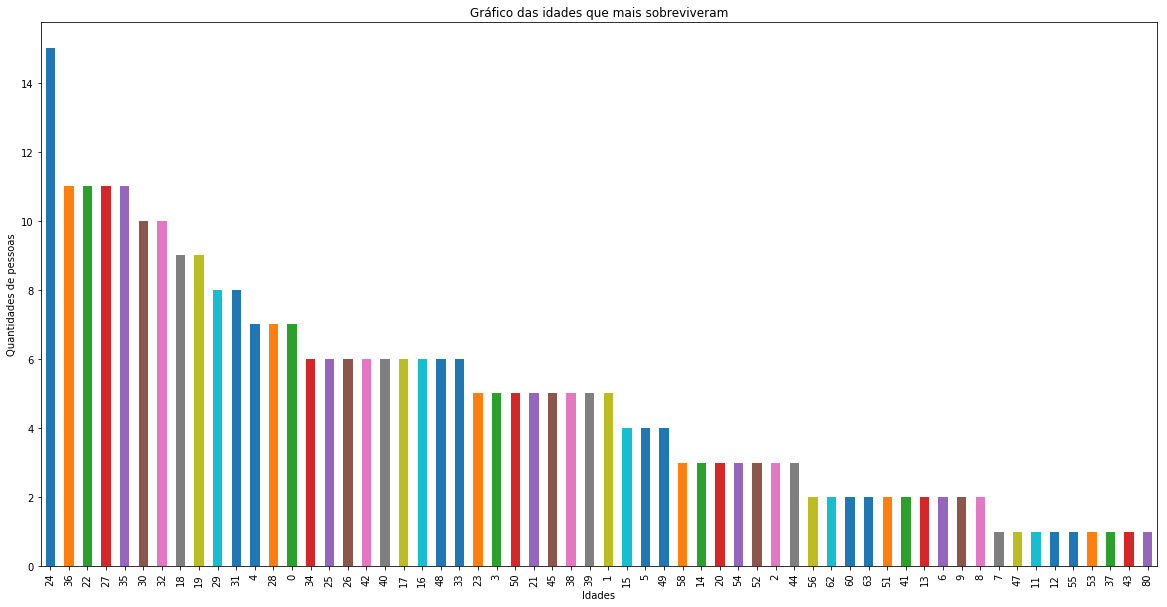

In [6]:
# verificando quais as idades que mais sobreviveram no desastre do Titanic. 

df_titanic_survived.dropna(axis=0, how='any', subset=['Age'], inplace=True)
df_titanic_survived['Age'] = df_titanic_survived['Age'].astype('int64')
df_titanic_survived['Age'].unique()

print('As pessoas com a idade de {} foram as que mais sobreviveram ao desastre do Titanic.'.format(df_titanic_survived['Age'].value_counts().idxmax()))
ax = df_titanic_survived['Age'].value_counts().plot(kind='bar', figsize=(20, 10), title='Gráfico das idades que mais sobreviveram');
ax.set(xlabel="Idades", ylabel="Quantidades de pessoas")
ax

Podemos perceber que a classe 1 e 3 foram as que mais sobreviveram.


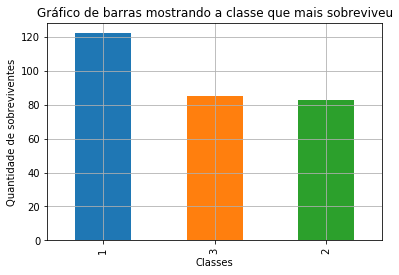

In [7]:
# Verificando quantos sobreviventes tiveram em cada classe.
ay = df_titanic_survived['Pclass'].value_counts().plot(kind='bar', title='Gráfico de barras mostrando a classe que mais sobreviveu', grid=True);
ay.set(xlabel="Classes", ylabel="Quantidade de sobreviventes")
print('Podemos perceber que a classe 1 e 3 foram as que mais sobreviveram.')

A correlação dos sobreviventes é 0.02, o que evidencia que as variáveis tem relação entre si, porém é muito fraca se aproximando bastante de zero.


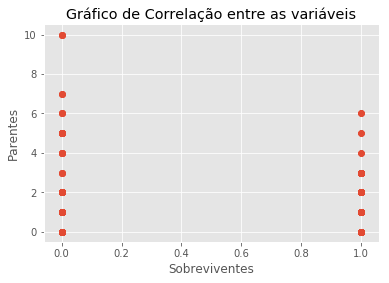

Portando podemos afirmar que o número de parentes presentes não influenciou de forma significante na sobrevivência dos passageiros.


In [9]:
# Verificando se há correlação entre a quantidade de sobreviventes e a quantidade de parentes.
df_titanic['Parents'] = df_titanic.apply(lambda row: row.SibSp + row.Parch, axis=1)
df_titanic.drop(columns=['SibSp', 'Parch'])

corr = df_titanic['Survived'].corr(df_titanic['Parents'])
corr = np.around(corr, decimals=2)
if corr < 0 :
    corr_status = 'Negativa'
else:
    corr_status = 'Positiva'

print('A correlação dos sobreviventes é {}, o que evidencia que as variáveis tem relação entre si, porém é muito fraca se aproximando bastante de zero.'.format(corr, corr_status))

plt.style.use('ggplot')

plt.scatter(df_titanic['Survived'], df_titanic['Parents'])
plt.title('Gráfico de Correlação entre as variáveis')
plt.xlabel('Sobreviventes')
plt.ylabel('Parentes')
plt.show()

print('Portando podemos afirmar que o número de parentes presentes não influenciou de forma significante na sobrevivência dos passageiros.')


# Conclusões

## Perguntas:

**Qual a faixa de idade que mais sobreviveu ?**<br>
Resposta: As pessoas com a idade de 24 foram as que mais sobreviveram ao desastre do Titanic.

**Qual foi o sexo que mais sobreviveu ?**<br>
O sexo que mais sobreviveu ao desastre do Titanic foi: feminino

**Pessoas com parentes/conjûges sobreviveram mais devido o trabalho em conjunto para sobreviver ?**<br>
Resposta: A correlação dos sobreviventes é 0.02, o que evidencia que as variáveis tem relação entre si, porém é muito fraca se aproximando bastante de zero, portando podemos afirmar que o número de parentes presentes não influenciou de forma significante na sobrevivência dos passageiros.

**Qual a classe que mais sobreviveu ?**<br>
Resposta: Podemos perceber que a classe 1 e 3 foram as que mais sobreviveram.

## Limitações

Encontrei dificuldade em saber quais dados deveria descartar e quais deveria manter para realizar a análise. Logo de início os dados sobre as idades estavam com muitos valores faltando, então tive que realizar a técnica de preencher com a média mas posteriormente descobri que isso iria afetar as respostas, tendênciando a quantidade que mais sobreviveu para a média pois existia muitos valores faltando que foram preenchidos com a média. Diante disso tive que realizar a exclusão dessas linhas para trabalhar somente com os dados concretos que possuía e consegui criar um gráfico para melhor visualização das idades que mais sobreviveram.<br> 



